In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data from well-known real estate site in Turkey with BeautifulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup
import lxml

data = [];
data2 = [];
data3 = [];
data4 = [];
data5 = [];
data6 = [];


for i in range(1,1181):
    url = "https://www.hepsiemlak.com/istanbul-satilik/daire?furnishStatus=UNFURNISHED&p63=180401-180402-180404-180407-180411-180405-180408-180409-180412-180413-180414-180416-180417-180418-180419-180421-180422-180423-180424-180426-180427-180428-180429-180431-180432-180433-180434&p31=200000&p32=30000000&p33=1&page="+str(i)+""
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "lxml")
    header = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"}
    emlak = r.content
    soup = BeautifulSoup(emlak, "html.parser")
    
    fiyat = (soup.find_all("div",{"class":"list-view-price"}))
    oda = (soup.find_all("span",{"class":"celly houseRoomCount"}))
    m2 = (soup.find_all("span",{"class":"celly squareMeter list-view-size"}))
    binayasi = (soup.find_all("span",{"class":"celly buildingAge"}))
    konum = (soup.find_all("div",{"class":"list-view-location"}))
    kat = (soup.find_all("span",{"class":"celly floortype"}))

    for div in fiyat:
        data.append(div.text.strip())
    for span in oda:
        data2.append(span.text.strip())
    for span2 in m2:
        data3.append(span2.text.strip())
    for span3 in binayasi:
        data4.append(span3.text.strip())
    for span4 in kat:
        data5.append(span4.text.strip())
    for div2 in konum:
        data6.append(div2.text.strip())   



In [ ]:
x = {'fiyat': data, 'oda': data2, 'm2': data3, 'binayasi': data4, 'konum': data6,'kat':data5}
ana = pd.DataFrame(x)

In [ ]:
x = {'fiyat': data,'oda': data2, 'm2': data3, 'binayasi': data4, 'konum': data6,'kat':data5}
site = pd.DataFrame(x)
site["siteicerisinde"] = 1


In [ ]:
x = {'fiyat': data,'oda': data2, 'm2': data3, 'binayasi': data4, 'konum': data6,'kat':data5}
banyo2 = pd.DataFrame(x)
banyo2["banyosayisi"] = 2


In [ ]:
x = {'fiyat': data,'oda': data2, 'm2': data3, 'binayasi': data4, 'konum': data6,'kat':data5}
banyo3 = pd.DataFrame(x)
banyo3["banyosayisi"] = 3


In [ ]:
bir = pd.merge(ana, site, on=["fiyat","oda","m2","binayasi","konum","kat"], how='outer')
iki = pd.merge(bir, banyo2, on=["fiyat","oda","m2","binayasi","konum","kat"], how='outer')
final = pd.merge(iki, banyo3, on=["fiyat","oda","m2","binayasi","konum","kat","banyosayisi"], how='outer')

final["siteicerisinde"].replace({np.NaN: "0"}, inplace=True)
final["banyosayisi"].replace({np.NaN: "1"}, inplace=True)

final.to_csv(r'C:\Users\Berkesun\Desktop\finalemlak.csv', index=False)

# Load the Data

In [106]:
result = pd.read_csv(r'../input/emlakdata/finalemlak.csv')
result

,fiyat,oda,m2,binayasi,konum,kat,siteicerisinde,banyosayisi
0,22.400.000\n TL,3 + 1,247 m2,18 Yaşında,"Beşiktaş,\n \n ...",Bahçe Katı,1.0,2.0
1,1.200.000\n TL,2 + 1,131 m2,45 Yaşında,"Beşiktaş,\n \n ...",Kot 2,0.0,1.0
2,735.000\n TL,2 + 1,105 m2,1 Yaşında,"Beylikdüzü,\n \n ...",Kot 1,0.0,1.0
3,1.050.000\n TL,3 + 1,165 m2,1 Yaşında,"Beylikdüzü,\n \n ...",2. Kat,0.0,2.0
4,739.000\n TL,2 + 1,100 m2,Sıfır Bina,"Beylikdüzü,\n \n ...",2. Kat,0.0,1.0
...,...,...,...,...,...,...,...,...
35931,8.500.000\n TL,5 + 1,305 m2,Sıfır Bina,"Kadıköy,\n \n ...",7. Kat,0.0,3.0
35932,7.200.000\n TL,4 + 1,250 m2,Sıfır Bina,"Üsküdar,\n \n ...",4. Kat,0.0,3.0
35933,18.000.000\n TL,5 + 2,320 m2,Sıfır Bina,"Kadıköy,\n \n ...",13. Kat,0.0,3.0
35934,29.900.000\n TL,6 + 1,361 m2,4 Yaşında,"Üsküdar,\n \n ...",2. Kat,0.0,3.0


# Data Preprocessing

In [107]:
result[['metrekare', 'cop']] = result['m2'].str.split(' ', expand=True)
result = result.drop(columns = ["m2","cop"])
result[['OdaS', 'Salon']] = result['oda'].str.split('+', expand=True)
result = result.drop(columns = ["oda"])
result[['Fiyat', 'cop']] = result['fiyat'].str.split('\n', expand=True)
result = result.drop(columns = ["fiyat","cop"])
result[['BinaYasi', 'cop']] = result['binayasi'].str.split(' ', expand=True)
result = result.drop(columns = ["cop","binayasi"])

In [108]:
result[['Ilce', 'Mahalle']] = result['konum'].str.split(',\n', expand=True)
result = result.drop(columns = ["konum"])
result[['Copp', 'Mahalle2']] = result['Mahalle'].str.split('\n ', expand=True)
result = result.drop(columns = ["Mahalle","Copp"])
result[['x1', 'x2']] = result['Mahalle2'].str.split('Mahallesi', expand=True)
result = result.drop(columns = ["Mahalle2","x2"])


In [109]:
result['x1'] = result['x1'].str.replace(' ', '')
result['konum'] = result[['Ilce', 'x1']].agg(','.join, axis=1)
result = result.drop(columns = ["x1","Ilce"])
result

,kat,siteicerisinde,banyosayisi,metrekare,OdaS,Salon,Fiyat,BinaYasi,konum
0,Bahçe Katı,1.0,2.0,247,3,1,22.400.000,18,"Beşiktaş,Etiler"
1,Kot 2,0.0,1.0,131,2,1,1.200.000,45,"Beşiktaş,Vişnezade"
2,Kot 1,0.0,1.0,105,2,1,735.000,1,"Beylikdüzü,Yakuplu"
3,2. Kat,0.0,2.0,165,3,1,1.050.000,1,"Beylikdüzü,Cumhuriyet"
4,2. Kat,0.0,1.0,100,2,1,739.000,Sıfır,"Beylikdüzü,Cumhuriyet"
...,...,...,...,...,...,...,...,...,...
35931,7. Kat,0.0,3.0,305,5,1,8.500.000,Sıfır,"Kadıköy,Erenköy"
35932,4. Kat,0.0,3.0,250,4,1,7.200.000,Sıfır,"Üsküdar,Ferah"
35933,13. Kat,0.0,3.0,320,5,2,18.000.000,Sıfır,"Kadıköy,Caddebostan"
35934,2. Kat,0.0,3.0,361,6,1,29.900.000,4,"Üsküdar,Burhaniye"


# Feature Engineering
**Point depending on the location shared by the Istanbul metropolitan municipality**

In [110]:
ibb = pd.read_csv(r'../input/emlakdata/ibbdata.csv')
ibb['Ilce'] = ibb['İLÇE ADI']
ibb['x1'] = ibb['MAHALLE ADI']
ibb = ibb.drop(columns = ["İLÇE ADI","MAHALLE ADI"])
ibb

,SES,SES SKORU,Ilce,x1
0,B,62.5,ADALAR,BURGAZADA
1,B,62.5,ADALAR,HEYBELİADA
2,C,37.5,ADALAR,KINALIADA
3,B,62.5,ADALAR,MADEN
4,B+,75.0,ADALAR,NİZAM
...,...,...,...,...
954,C,37.5,ZEYTİNBURNU,SÜMER
955,C,37.5,ZEYTİNBURNU,TELSİZ
956,C,37.5,ZEYTİNBURNU,VELİEFENDİ
957,C,37.5,ZEYTİNBURNU,YENİDOĞAN


# Data Preprocessing

In [111]:
ibb['konum'] = ibb[['Ilce', 'x1']].agg(','.join, axis=1)
ibb = ibb.drop(columns = ["Ilce","x1"])
#result = result.drop(columns = ["Ilce","x1"])
result['konum'] = result['konum'].str.upper()
ibb['konum'] = ibb['konum'].str.replace(' ', '')
result['konum'] = result['konum'].str.replace('İ', 'I')
ibb['konum'] = ibb['konum'].str.replace('İ', 'I')

ibb['konum'] = ibb['konum'].str.replace('EYÜP', 'EYÜPSULTAN')

ibb

,SES,SES SKORU,konum
0,B,62.5,"ADALAR,BURGAZADA"
1,B,62.5,"ADALAR,HEYBELIADA"
2,C,37.5,"ADALAR,KINALIADA"
3,B,62.5,"ADALAR,MADEN"
4,B+,75.0,"ADALAR,NIZAM"
...,...,...,...
954,C,37.5,"ZEYTINBURNU,SÜMER"
955,C,37.5,"ZEYTINBURNU,TELSIZ"
956,C,37.5,"ZEYTINBURNU,VELIEFENDI"
957,C,37.5,"ZEYTINBURNU,YENIDOĞAN"


In [112]:
ibb['konum'] = ibb['konum'].str.replace('KÜÇÜKYALIMERKEZ', 'KÜÇÜKYALI')
ibb['konum'] = ibb['konum'].str.replace('ORTAMAHALLE', 'ORTA')
ibb['konum'] = ibb['konum'].str.replace('15TEMMUZ/EVREN', '15TEMMUZ')
ibb['konum'] = ibb['konum'].str.replace('MURATÇESME', 'MURATÇEŞME')
ibb['konum'] = ibb['konum'].str.replace('EMNiYETTEPE', 'EMNIYETTEPE')
ibb['konum'] = ibb['konum'].str.replace('SARIYER,MERKEZ', 'SARIYER,SARIYERMERKEZ')
ibb['konum'] = ibb['konum'].str.replace('SANCAKTEPE,EYÜPSULTANSULTAN', 'SANCAKTEPE,EYÜPSULTAN')
ibb['konum'] = ibb['konum'].str.replace('EYÜPSULTANSULTAN', 'EYÜPSULTAN')

# Join Dataframes

In [113]:
emlak = result.join(ibb.set_index('konum'), on='konum')
emlak

,kat,siteicerisinde,banyosayisi,metrekare,OdaS,Salon,Fiyat,BinaYasi,konum,SES,SES SKORU
0,Bahçe Katı,1.0,2.0,247,3,1,22.400.000,18,"BEŞIKTAŞ,ETILER",A+,100.0
1,Kot 2,0.0,1.0,131,2,1,1.200.000,45,"BEŞIKTAŞ,VIŞNEZADE",A,87.5
2,Kot 1,0.0,1.0,105,2,1,735.000,1,"BEYLIKDÜZÜ,YAKUPLU",C,37.5
3,2. Kat,0.0,2.0,165,3,1,1.050.000,1,"BEYLIKDÜZÜ,CUMHURIYET",B+,75.0
4,2. Kat,0.0,1.0,100,2,1,739.000,Sıfır,"BEYLIKDÜZÜ,CUMHURIYET",B+,75.0
...,...,...,...,...,...,...,...,...,...,...,...
35931,7. Kat,0.0,3.0,305,5,1,8.500.000,Sıfır,"KADIKÖY,ERENKÖY",A,87.5
35932,4. Kat,0.0,3.0,250,4,1,7.200.000,Sıfır,"ÜSKÜDAR,FERAH",C+,50.0
35933,13. Kat,0.0,3.0,320,5,2,18.000.000,Sıfır,"KADIKÖY,CADDEBOSTAN",A+,100.0
35934,2. Kat,0.0,3.0,361,6,1,29.900.000,4,"ÜSKÜDAR,BURHANIYE",B,62.5


# Take a Quick Look at the Data Structure

In [114]:
emlak.head()

,kat,siteicerisinde,banyosayisi,metrekare,OdaS,Salon,Fiyat,BinaYasi,konum,SES,SES SKORU
0,Bahçe Katı,1.0,2.0,247,3,1,22.400.000,18,"BEŞIKTAŞ,ETILER",A+,100.0
1,Kot 2,0.0,1.0,131,2,1,1.200.000,45,"BEŞIKTAŞ,VIŞNEZADE",A,87.5
2,Kot 1,0.0,1.0,105,2,1,735.000,1,"BEYLIKDÜZÜ,YAKUPLU",C,37.5
3,2. Kat,0.0,2.0,165,3,1,1.050.000,1,"BEYLIKDÜZÜ,CUMHURIYET",B+,75.0
4,2. Kat,0.0,1.0,100,2,1,739.000,Sıfır,"BEYLIKDÜZÜ,CUMHURIYET",B+,75.0


# Information About Data


In [115]:
emlak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35936 entries, 0 to 35935
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kat             35936 non-null  object 
 1   siteicerisinde  35936 non-null  float64
 2   banyosayisi     35936 non-null  float64
 3   metrekare       35936 non-null  object 
 4   OdaS            35936 non-null  object 
 5   Salon           35817 non-null  object 
 6   Fiyat           35936 non-null  object 
 7   BinaYasi        35936 non-null  object 
 8   konum           35936 non-null  object 
 9   SES             35881 non-null  object 
 10  SES SKORU       35881 non-null  float64
dtypes: float64(3), object(8)
memory usage: 3.0+ MB


In [116]:
emlak.describe()


,siteicerisinde,banyosayisi,SES SKORU
count,35936.000000,35936.000000,35881.000000
mean,0.112589,1.434467,63.662523
std,0.316094,0.525082,24.966066
min,0.000000,1.000000,12.500000
25%,0.000000,1.000000,37.500000
50%,0.000000,1.000000,62.500000
75%,0.000000,2.000000,87.500000
max,1.000000,3.000000,100.000000


# Histogram Plot For Integer Variables

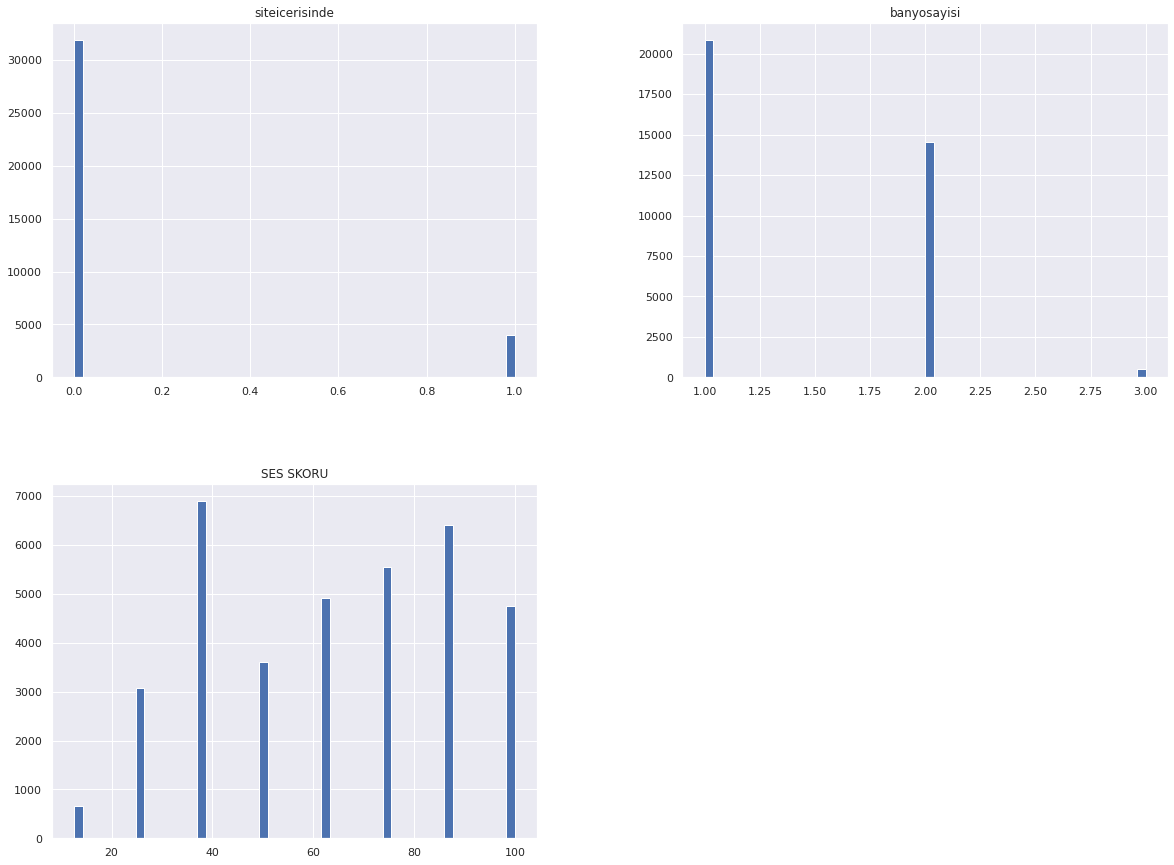

In [117]:
emlak.hist(bins = 50, figsize = (20,15))
plt.show()

# Data Cleaning


In [119]:


emlak.drop(emlak.loc[emlak['konum']=="BEYLIKDÜZÜ,BEYLIKDÜZÜOSB"].index, inplace=True)
emlak.drop(emlak.loc[emlak['konum']=="BAŞAKŞEHIR,IKITELLIOSB"].index, inplace=True)
emlak.drop(emlak.loc[emlak['konum']=="ESENLER,15TEMMUZ"].index, inplace=True)
emlak.drop(emlak.loc[emlak['konum']=="ÜMRANIYE,FINANSKENT"].index, inplace=True)
emlak.drop(emlak.loc[emlak['konum']=="BAKIRKÖY,YEŞILKÖYSB"].index, inplace=True)
emlak.drop(emlak.loc[emlak['konum']=="TUZLA,AYDINLISB"].index, inplace=True)
emlak.drop(emlak.loc[emlak['konum']=="ÜMRANIYE,YENIŞEHIR"].index, inplace=True)


In [120]:
emlak['Fiyat'] = emlak['Fiyat'].str.replace('.','',regex=True).astype(int)
emlak["OdaS"].replace({"Stüdyo": "1"}, inplace=True)
emlak["BinaYasi"].replace({"Sıfır": "0"}, inplace=True)
emlak["Salon"].replace({np.NaN: "0"}, inplace=True)
emlak[["OdaS", "Salon","metrekare","BinaYasi","banyosayisi"]] = emlak[["OdaS", "Salon","metrekare","BinaYasi","banyosayisi"]].apply(pd.to_numeric)


In [121]:
emlak['siteicerisinde'] = emlak['siteicerisinde'].replace(1, 'Evet')
emlak['siteicerisinde'] = emlak['siteicerisinde'].replace(0, 'Hayır')
emlak["siteicerisinde"].value_counts()

Hayır    31850
Evet      4031
Name: siteicerisinde, dtype: int64

kat               0
siteicerisinde    0
banyosayisi       0
metrekare         0
OdaS              0
Salon             0
Fiyat             0
BinaYasi          0
konum             0
SES               0
SES SKORU         0
dtype: int64

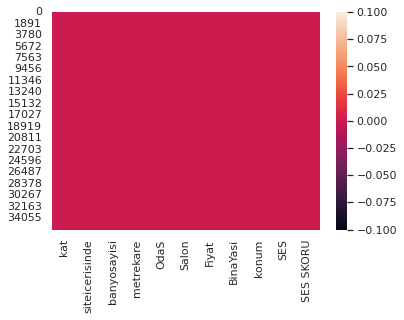

In [122]:
sns.heatmap(emlak.isnull())
emlak.isnull().sum()

# Categorizing

In [123]:
emlak["BinaYasi_cat"] = pd.cut(emlak["BinaYasi"],
                               bins=[-1., 0, 5,10,15,20, np.inf],
                               labels=[1, 2, 3,4,5,6])
emlak["BinaYasi_cat"].value_counts()

1    9828
6    9316
2    8435
3    4508
4    2247
5    1547
Name: BinaYasi_cat, dtype: int64

# Data visualization


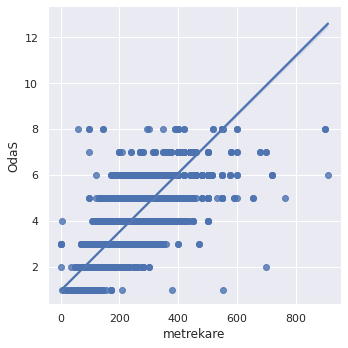

In [124]:
sns.lmplot(x='metrekare', y='OdaS', data=emlak)


<AxesSubplot:xlabel='BinaYasi', ylabel='siteicerisinde'>

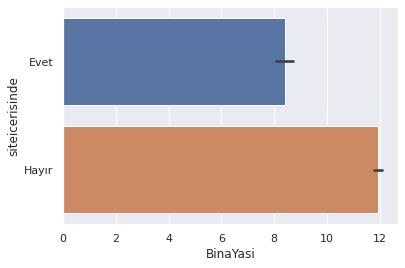

In [125]:
sns.barplot(x = "BinaYasi", y = "siteicerisinde", data = emlak)


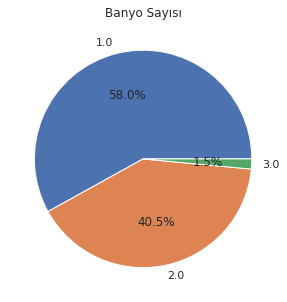

In [126]:
fig = plt.figure(figsize=(20,5))
emlak.banyosayisi.value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 20)
plt.title("Banyo Sayısı");


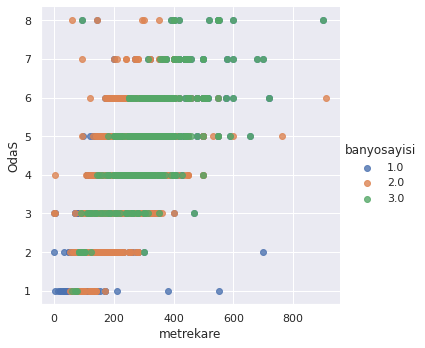

In [127]:
sns.lmplot(x = 'metrekare', y = 'OdaS', fit_reg = False, hue = 'banyosayisi', data = emlak)


# Looking for Correlations

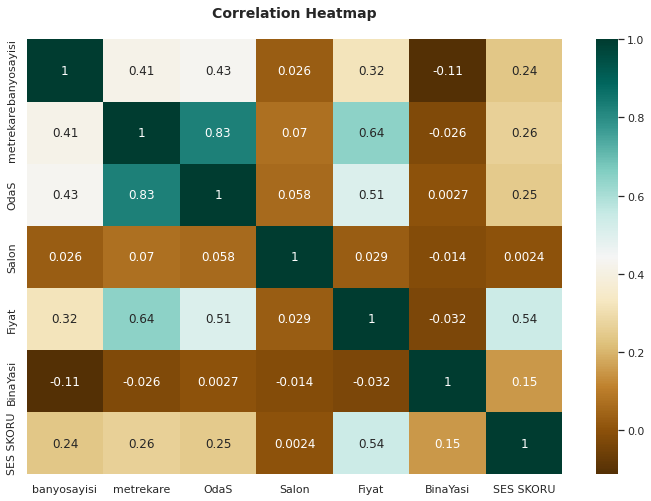

In [128]:
plt.figure(figsize=(12,8))
sns.heatmap(emlak.corr(),annot=True,cmap='BrBG')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

# Create a Test Set

In [129]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(emlak, test_size=0.2, random_state=42)


# Prepare the Data for Machine Learning Algorithms

In [130]:
emlak = train_set.drop("Fiyat", axis=1) 
emlak_labels = train_set["Fiyat"].copy()


# Pipeline for Categorical Attributes

In [131]:
emlak_cat = pd.concat([emlak['BinaYasi_cat'],emlak['SES'],emlak['kat'],emlak['siteicerisinde']],axis=1,keys=['BinaYasi_cat','SES','kat','siteicerisinde'])
emlak_cat


,BinaYasi_cat,SES,kat,siteicerisinde
8468,2,D,Ara Kat,Hayır
12765,2,C,5. Kat,Evet
17500,4,B,Ara Kat,Hayır
35873,1,A+,12. Kat,Hayır
27843,2,D,11. Kat,Hayır
...,...,...,...,...
16874,6,C+,5. Kat,Hayır
6270,6,B+,Giriş Katı,Hayır
11296,2,B+,4. Kat,Hayır
860,2,B+,3. Kat,Hayır


In [132]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
emlak_cat_1hot = cat_encoder.fit_transform(emlak_cat)
emlak_cat_1hot

<28704x54 sparse matrix of type '<class 'numpy.float64'>'
	with 114816 stored elements in Compressed Sparse Row format>

In [133]:
emlak_cat_1hot.toarray()


array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [134]:
cat_encoder.categories_


[array([1, 2, 3, 4, 5, 6]),
 array(['A', 'A+', 'B', 'B+', 'C', 'C+', 'D', 'E'], dtype=object),
 array(['1. Kat', '10. Kat', '11. Kat', '12. Kat', '13. Kat', '14. Kat',
        '15. Kat', '16. Kat', '17. Kat', '18. Kat', '19. Kat', '2. Kat',
        '20. Kat', '21 ve üzeri', '3. Kat', '4. Kat', '5. Kat', '6. Kat',
        '7. Kat', '8. Kat', '9. Kat', 'Ara Kat', 'Asma Kat', 'Bahçe Katı',
        'Bodrum', 'Bodrum ve Zemin', 'Dubleks', 'En Üst Kat', 'Giriş Katı',
        'Kot 1', 'Kot 2', 'Kot 3', 'Teras Katı', 'Villa Katı',
        'Yarı Bodrum', 'Yüksek Giriş', 'Zemin', 'Çatı Katı'], dtype=object),
 array(['Evet', 'Hayır'], dtype=object)]

# Pipeline for Numerical Attributes

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

emlak_num = emlak.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy="median")
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

emlak_num_tr = num_pipeline.fit_transform(emlak_num)

# PIPELINE

In [136]:
from sklearn.compose import ColumnTransformer

num_attribs = list(emlak_num)
cat_attribs = ['BinaYasi_cat','SES','kat','siteicerisinde']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

emlak_prepared = full_pipeline.fit_transform(emlak)

# Select a Model and Hyperparameter Tuning

In [137]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,
                  n_jobs = -1)
clf.fit(emlak_prepared, emlak_labels)
print("Best parameters:", clf.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 70.8min finished


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}


In [138]:
clf.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=20,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=20,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [139]:
feature_importances = clf.best_estimator_.feature_importances_
feature_importances

array([0.00956702, 0.05926181, 0.03443491, 0.03796082, 0.01135897,
       0.11846584, 0.01253728, 0.00929083, 0.00559524, 0.00756129,
       0.00838415, 0.01695643, 0.05192702, 0.22043982, 0.0145999 ,
       0.01295346, 0.02274107, 0.01493856, 0.02939668, 0.02370928,
       0.00958226, 0.00713225, 0.00688535, 0.01315104, 0.00584804,
       0.0178896 , 0.00530494, 0.00456717, 0.00232714, 0.00257701,
       0.00095918, 0.00760013, 0.00187726, 0.00604241, 0.00630884,
       0.00853246, 0.00643219, 0.00601667, 0.00829343, 0.01218316,
       0.00899243, 0.00534087, 0.        , 0.01155214, 0.00793503,
       0.00112257, 0.00344845, 0.00653448, 0.00529101, 0.00216901,
       0.00196593, 0.00333995, 0.00576516, 0.01762795, 0.00800711,
       0.00601615, 0.00554263, 0.00846671, 0.01428127, 0.01501026],
      dtype=float32)

In [140]:
clf_model = clf.best_estimator_

X_test =test_set.drop("Fiyat", axis=1)
y_test = test_set["Fiyat"].copy()

X_test_prepared = full_pipeline.transform(X_test)
emlak_predictions = clf_model.predict(X_test_prepared)

# Performance Measures

# **Cross Validation**

In [141]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

forest_scores = cross_val_score(clf_model, emlak_prepared, emlak_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2037139.0594163  1925503.04494624 1836681.51926804 1773794.29325849
 1836128.51425966 1925709.40604528 1812421.63067248 1784640.91067146
 1964352.36802121 2130515.254592  ]
Mean: 1902688.6001151148
Standard deviation: 110597.96201280721


In [142]:
from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(clf_model, emlak_prepared, emlak_labels, cv=10)
cvscore.mean()

0.8066650083372977

# R2 and Model Score

In [143]:
from sklearn.metrics import r2_score


r2_score(y_test,emlak_predictions)

0.812204844127262

In [144]:
clf_model.score(emlak_prepared, emlak_labels)


0.930996362536982

In [145]:
clf_model.score(X_test_prepared,y_test)

0.812204844127262

# Look Predicts

In [146]:
emlak_predictions = emlak_predictions.round(decimals=0, out=None)

x = pd.DataFrame({'metrekare':test_set['metrekare'],'OdaS':test_set['OdaS'],'Salon':test_set['Salon'],'konum':test_set['konum'],'SES':test_set['SES'],
                  'SES SKORU':test_set['SES SKORU'],'BinaYasi':test_set['BinaYasi'],'kat':test_set['kat'],'SiteIcerisinde':test_set['siteicerisinde'],'banyosayisi':test_set['banyosayisi'],
                  'Fiyat':emlak_predictions})
x.iloc[3:50]

,metrekare,OdaS,Salon,konum,SES,SES SKORU,BinaYasi,kat,SiteIcerisinde,banyosayisi,Fiyat
35653,200.0,4,2,"KÜÇÜKÇEKMECE,CENNET",C+,50.0,4,5. Kat,Hayır,3.0,2934358.0
9632,125.0,3,1,"SULTANGAZI,UĞURMUMCU",D,25.0,5,4. Kat,Hayır,2.0,1117338.0
7097,120.0,3,1,"BEYOĞLU,FIRUZAĞA",B+,75.0,50,3. Kat,Hayır,2.0,2284152.0
12585,130.0,3,1,"KAĞITHANE,ORTABAYIR",C+,50.0,5,3. Kat,Hayır,2.0,1942933.0
14173,130.0,3,1,"ÇEKMEKÖY,SOĞUKPINAR",D,25.0,9,En Üst Kat,Evet,1.0,1305013.0
32479,130.0,3,1,"ESENYURT,MEHMETAKIFERSOY",C,37.5,5,5. Kat,Hayır,2.0,1564671.0
20555,95.0,2,1,"SULTANGAZI,SULTANÇIFTLIĞI",D,25.0,0,4. Kat,Hayır,1.0,821026.0
2209,200.0,4,1,"KADIKÖY,FENERBAHÇE",A+,100.0,0,14. Kat,Hayır,2.0,12191601.0
6220,150.0,3,1,"BEYLIKDÜZÜ,BÜYÜKŞEHIR",B,62.5,12,5. Kat,Hayır,2.0,1986431.0
28348,90.0,2,1,"BAKIRKÖY,OSMANIYE",B,62.5,0,2. Kat,Hayır,1.0,1343115.0
